In [1]:
# Stephen.Griffies@noaa.gov 

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import cmocean
import mplsettings

import cartopy.crs as ccrs
%matplotlib inline

In [3]:
dirstix = "../../common/static_ttf"
#dirstix = "/net2/rnd/dev/stixfonts/fonts/static_ttf"
import matplotlib.font_manager as font_manager
for font in font_manager.findSystemFonts(dirstix):
    font_manager.fontManager.addfont(font)

# Set font family globally
plt.rcParams['font.family'] = 'STIX Two Text'

In [4]:
# datasets for p25
static_p25 = xr.open_mfdataset("../../common/CM4X_p25/ocean_annual.static.nc")
#staticp25 = xr.open_mfdataset("/net/smg/OWG/CM4_highres/grids/p25/ocean_annual.static.nc")
dsp25 = xr.open_mfdataset("CM4Xp25_cor_tos_hfturb.nc")
dsp25 = dsp25.rename({'__xarray_dataarray_variable__': 'cor_tos_hfturb_p25'})
cor_tos_hfturb_p25 = dsp25['cor_tos_hfturb_p25']

In [5]:
# datasets for p125
static_p125 = xr.open_mfdataset("../../common/CM4X_p125/ocean_annual.static.nc")
#staticp125 = xr.open_mfdataset("/net/smg/OWG/CM4_highres/grids/p125/ocean_annual.static.nc")
dsp125     = xr.open_mfdataset("CM4Xp125_cor_tos_hfturb.nc")
dsp125     = dsp125.rename({'__xarray_dataarray_variable__': 'cor_tos_hfturb_p125'})
cor_tos_hfturb_p125 = dsp125['cor_tos_hfturb_p125']


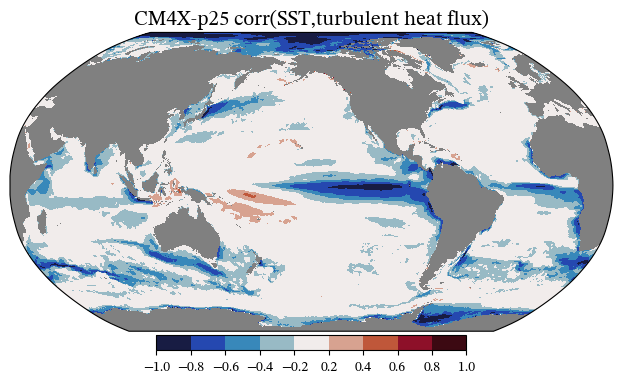

In [6]:
field = cor_tos_hfturb_p25
vmin=-1
vmax=1
levels= [-1, -0.8, -0.6, -0.4, -0.2, 0.2, 0.4, 0.6, 0.8, 1.0]


fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6.5 ,4.0),
             subplot_kw={'projection': ccrs.Robinson(central_longitude=-150)})

p=xr.plot.pcolormesh(field, ax=axis, x="geolon", y="geolat",
#                     vmin=vmin, vmax=vmax,
                     transform=ccrs.PlateCarree(), 
#                     cmap='RdYlBu_r',
                     cmap=cmocean.cm.balance,
#                     cmap=cmocean.cm.diff,
                     add_colorbar=False,
                     levels=levels
            )
#axs.gridlines()
plt.gca().set_facecolor('gray')
plt.tick_params(labelsize=12) 
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('CM4X-p25 corr(SST,turbulent heat flux)', fontsize=15)
cbar = plt.colorbar(p,pad=0.01,spacing='uniform', shrink=0.5,orientation='horizontal')
#cbar = plt.colorbar(p,pad=0.01,spacing='uniform', extend='none', shrink=0.5,orientation='horizontal')

plt.tight_layout()
plt.show()
fig.savefig('Fig13_CM4Xp25_corr_SST_hfturb.jpg', bbox_inches='tight', dpi=400, format='jpeg')

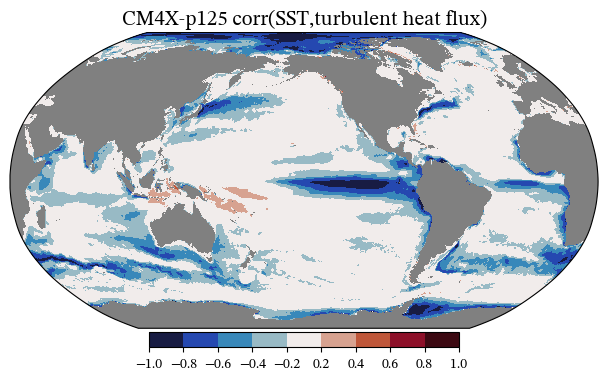

In [7]:
field = cor_tos_hfturb_p125
vmin=-1
vmax=1
levels= [-1, -0.8, -0.6, -0.4, -0.2, 0.2, 0.4, 0.6, 0.8, 1.0]


fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6.5,4.0),
             subplot_kw={'projection': ccrs.Robinson(central_longitude=-150)})

p=xr.plot.pcolormesh(field, ax=axis, x="geolon", y="geolat",
#                     vmin=vmin, vmax=vmax,
                     transform=ccrs.PlateCarree(), 
#                     cmap='RdYlBu_r',
                     cmap=cmocean.cm.balance,
#                     cmap=cmocean.cm.diff,
                     add_colorbar=False,
                     levels=levels
            )
#axs.gridlines()
plt.gca().set_facecolor('gray')
plt.tick_params(labelsize=12) 
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('CM4X-p125 corr(SST,turbulent heat flux)', fontsize=15)
cbar = plt.colorbar(p,pad=0.01,spacing='uniform', shrink=0.5,orientation='horizontal')
#cbar = plt.colorbar(p,pad=0.01,spacing='uniform', extend='none', shrink=0.5,orientation='horizontal')

plt.tight_layout()
plt.show()
fig.savefig('Fig13_CM4Xp125_corr_SST_hfturb.jpg', bbox_inches='tight', dpi=400, format='jpeg')